In [1]:
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import gensim
import gensim.corpora as corpora
from pprint import pprint
import seaborn as sns
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [2]:
df = pd.read_csv("US_Bing_data.csv")

In [4]:
df.head(1)

,Unnamed: 0,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,0,2020-01-01,coronavirus,False,Michigan,United States,1


In [3]:
df1 = df.iloc[17338:]
df1 = df1[["Date", "Query", "State"]]
df1.head()

,Date,Query,State
17338,2020-02-01,coronavirus death,New York
17339,2020-02-01,coronavirus death toll,Colorado
17340,2020-02-01,corona virus,Alabama
17341,2020-02-01,coronavirus deaths,Colorado
17342,2020-02-01,how did the coronavirus start,Ohio


In [6]:
import re
# replaces spaces in keywords with connector matcher.
def replace_connector(keyword):
  connector = "[ -_]?"
  return connector.join(keyword.split())

vaccine_keywords = ["vaccine", "vaccination"]
vaccine_query = r"\b(" + "|".join(map(replace_connector, vaccine_keywords)) + r")\b"
vaccine_reg = re.compile(vaccine_query, re.IGNORECASE)

#Filter tweets when keywords mention specified vaccine name related to covid
vac_name_keywords = [i.lower() for i in ["Pfizer", "BNT162b2", "AstraZeneca", "AZD1222", "Moderna", "mRNA-1273", "Janssen", "Ad26.COV2.S"]]
vac_name_query = r"\b(" + "|".join(map(replace_connector, vac_name_keywords)) + r")\b"
vac_name_reg = re.compile(vac_name_query, re.IGNORECASE)


In [8]:
vaccine_reg.search("vaccin")

In [4]:
df1["words"] = df1["Query"].str.split(" ")
df1["month"] =  df1["Date"].str[:-3]
df1.head(1)

,Date,Query,State,words,month
17338,2020-02-01,coronavirus death,New York,"[coronavirus, death]",2020-02


In [28]:
vaccine_count = [0] * len(df1)
for i in tqdm(range(len(df1))):
    if "election" in df1.iloc[i]["words"]:
        vaccine_count[i] += 1
        print(df1.iloc[i]["words"])
        break
        

  2%|▏         | 142990/5849604 [00:09<06:15, 15214.29it/s]

['election', 'year', 'viruses']


In [41]:
words_date = word_date.copy()

In [5]:
word_date = {}
words_date = {}
for i in tqdm(range(len(df1))):
    words = df1.iloc[i]["words"]
    month = df1.iloc[i]["month"]
    if month not in word_date:
        word_date[month] = []
        words_date[month] = []
    word_date[month].append(words)
    words_date[month] += words

100%|██████████| 5849604/5849604 [12:43<00:00, 7661.61it/s]


In [6]:
word_date.keys()

dict_keys(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2020-1220-12', '20020-12', '2020-12020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '201-07', '1-07'])

In [53]:
"coronavirus" in Counter(words_date["2020-02"])

True

In [7]:
words = ["country", "testing", "check", "health", "cdc", "symptoms", "coronavirus", "vaccine", "unemployment", "stimulus"]
words_dict = {}
for i in words_date.keys():
    if len(i) == 7:
        words_counter = Counter(words_date[i])
        for word in words:
            if word not in words_dict:
                    words_dict[word] = []
            if word in words_counter:
                words_dict[word].append(words_counter[word])
            else:
                words_dict[word].append(0)
                
            

In [8]:
bing_key_df = pd.DataFrame(index=['2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07'])
for key,value in words_dict.items():
    bing_key_df[key] = value
bing_key_df.head(1)

,country,testing,check,health,cdc,symptoms,coronavirus,vaccine,unemployment,stimulus
2020-02,13,11,0,236,2409,3477,36893,413,0,0


In [60]:
cor_bing = bing_key_df.corr()
cor_bing

,country,testing,check,health,cdc,symptoms,coronavirus,vaccine,unemployment,stimulus
country,1.000000,-0.004454,-0.022888,0.002064,0.165218,0.208215,0.803565,-0.068507,0.072655,0.023596
testing,-0.004454,1.000000,0.962597,0.772891,0.940659,0.959029,0.490064,0.849560,0.928484,0.973255
check,-0.022888,0.962597,1.000000,0.646337,0.836315,0.890600,0.496814,0.810866,0.831961,0.996385
health,0.002064,0.772891,0.646337,1.000000,0.861500,0.762288,0.258869,0.910138,0.846511,0.687492
cdc,0.165218,0.940659,0.836315,0.861500,1.000000,0.978069,0.565273,0.817374,0.979124,0.869375
symptoms,0.208215,0.959029,0.890600,0.762288,0.978069,1.000000,0.657742,0.761119,0.961580,0.914207
coronavirus,0.803565,0.490064,0.496814,0.258869,0.565273,0.657742,1.000000,0.267595,0.520722,0.530727
vaccine,-0.068507,0.849560,0.810866,0.910138,0.817374,0.761119,0.267595,1.000000,0.781233,0.836469
unemployment,0.072655,0.928484,0.831961,0.846511,0.979124,0.961580,0.520722,0.781233,1.000000,0.859278
stimulus,0.023596,0.973255,0.996385,0.687492,0.869375,0.914207,0.530727,0.836469,0.859278,1.000000


<AxesSubplot:>

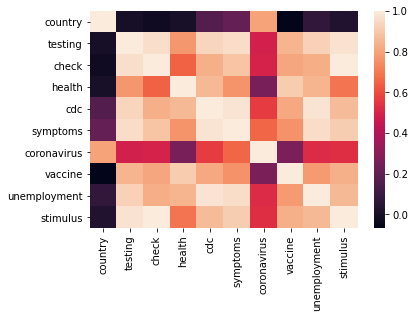

In [61]:
sns.heatmap(cor_bing)

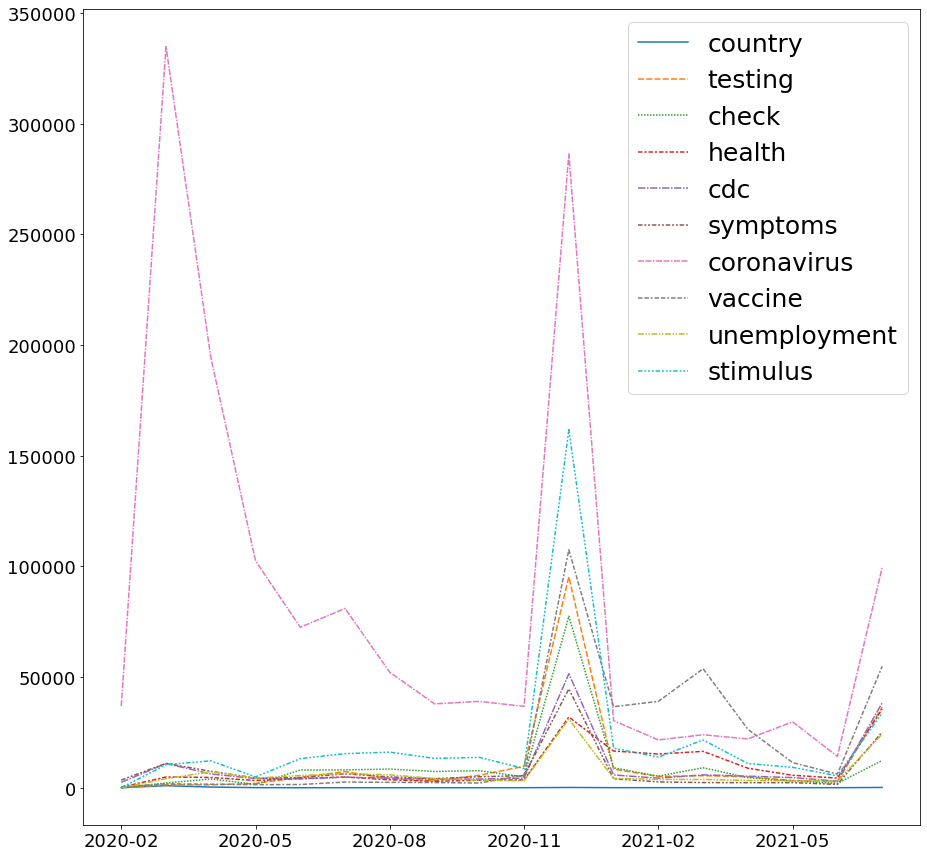

In [25]:
import numpy as np
plt.figure(figsize=(15,15))
sns.lineplot(data=bing_key_df).set_xticks(np.arange(0, bing_key_df.shape[0], step=3)) 
plt.legend(fontsize=25)  
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

# Topic modeling

In [38]:
# Create Dictionary
id2word = corpora.Dictionary(list(word_date["2020-02"]))
# Create Corpus
texts = tweet_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
topic_list = []
for i in tqdm(range(len(corpus))):
    topic_list.append(lda_model.get_document_topics(corpus[i])[0][0])

Counter(topic_list)

## Word Embedding on Bing

In [29]:
word_list = [value for key,value in word_date.items()]

In [32]:
model = Word2Vec(sentences=word_list, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [34]:
model.wv.most_similar("china")

[('wuhan', 0.9690375924110413),
 ('japan', 0.9207603335380554),
 ('coronovirus', 0.9039887189865112),
 ('man', 0.9024348855018616),
 ('cruise', 0.901425302028656),
 ('pelosi', 0.89887535572052),
 ('ship', 0.895266592502594),
 ('who', 0.8939473628997803),
 ('novel', 0.8876398801803589),
 ('cure', 0.8749987483024597)]

### count vaccine 

In [27]:
# df_vaccine = df1.groupby("month").sum()
# df_vaccine = df_vaccine.drop(["1-07", "20020-12", "201-07", "2020-12020-12", "2020-1220-12"])
list(df_vaccine["vaccine_count"])

[413,
 1759,
 1604,
 1399,
 1458,
 2556,
 2438,
 2340,
 2120,
 5634,
 107538,
 36614,
 39023,
 53761,
 26414,
 11356,
 6176,
 54819]

In [ ]:
"country", "testing", "check", "health", "cdc", "symptoms", "coronavirus", "vaccine", "unemployment", "stimulus"

In [18]:
words = [j.lower() for i in list(df1["words"]) for j in i]

In [130]:
Counter(words).most_common(20)

[('coronavirus', 1516069),
 ('covid', 1301562),
 ('update', 471891),
 ('stimulus', 382253),
 ('vaccine', 357435),
 ('19', 337929),
 ('county', 249027),
 ('testing', 200806),
 ('cases', 191765),
 ('check', 174758),
 ('health', 169969),
 ('cdc', 167513),
 ('in', 163605),
 ('symptoms', 141559),
 ('of', 137492),
 ('virus', 124242),
 ('map', 123104),
 ('unemployment', 120468),
 ('for', 117331),
 ('corona', 110116)]

coronavirus, covid, update, stimulus, vaccine, 19, county, testing, cases, check

In [45]:
coronavirus = [0.128, 0.277, 0.23, 0.075, 0.083, 0.033, 0.143, 0.028, 0.176, 0.14, 0.184, 0.074, 0.02, 0.041, 0.058, 0.148, 0.023, 0.148]
stimulus = [0, 0, 0.15, 0, 0.033, 0.018, 0.052, 0.036, 0, 0.051, 0, 0, 0.1, 0.016, 0.016, 0, 0, 0.044]
vaccine = [0, 0, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0.015, 0.018, 0.046, 0.023, 0, 0.032]
unemployment = [0, 0, 0, 0, 0.041, 0.02, 0, 0.037, 0.021, 0, 0, 0.019, 0, 0, 0, 0, 0, 0]
len(coronavirus),len(stimulus), len(vaccine), len(unemployment)

(18, 18, 18, 18)

In [46]:
w_trend = pd.DataFrame(index=['2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07'])
w_trend["coronavirus"] = coronavirus
w_trend["stimulus"] = stimulus
w_trend["vaccine"] = vaccine
w_trend["unemployment"] = unemployment

In [47]:
cor_bing = w_trend.corr()
cor_bing

,coronavirus,stimulus,vaccine,unemployment
coronavirus,1.000000,0.113687,-0.268221,-0.296556
stimulus,0.113687,1.000000,0.024614,-0.096041
vaccine,-0.268221,0.024614,1.000000,-0.135724
unemployment,-0.296556,-0.096041,-0.135724,1.000000


[Text(0.5, 1.0, 'Vaccine Trend in Bing')]

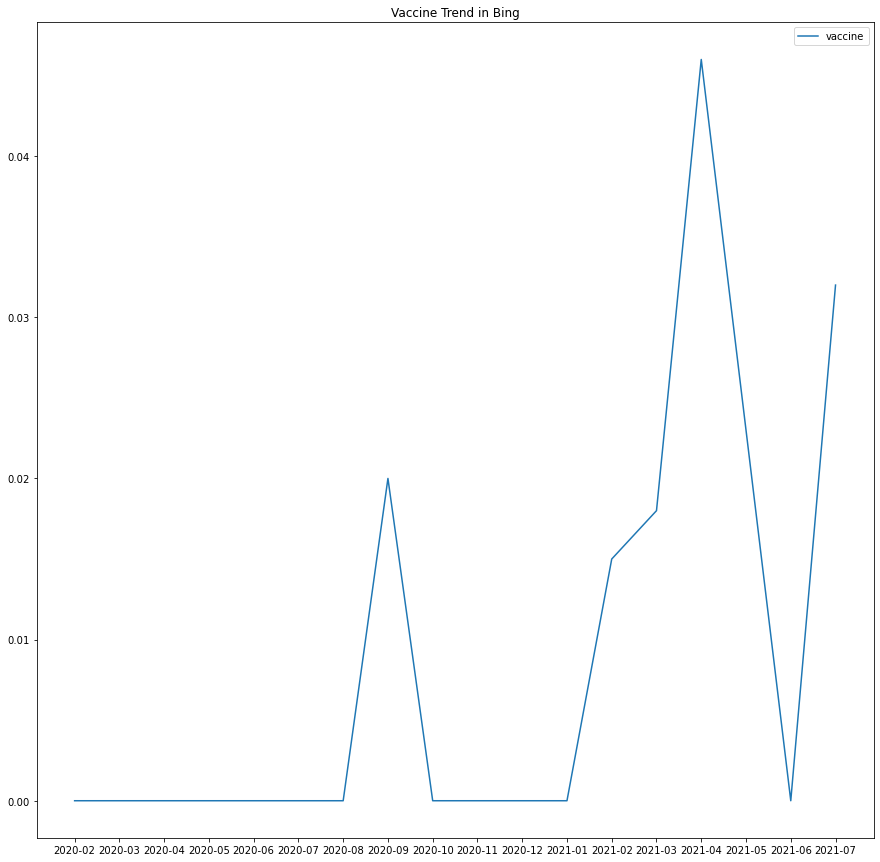

In [138]:
w_trend = pd.DataFrame(index=['2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07'])
# w_trend["coronavirus"] = coronavirus
# w_trend["stimulus"] = stimulus
w_trend["vaccine"] = vaccine
# w_trend["unemployment"] = unemployment
plt.figure(figsize=(15, 15))
sns.lineplot(data=w_trend).set(title="Vaccine Trend in Bing")

In [ ]:
w_trend.reset_index()

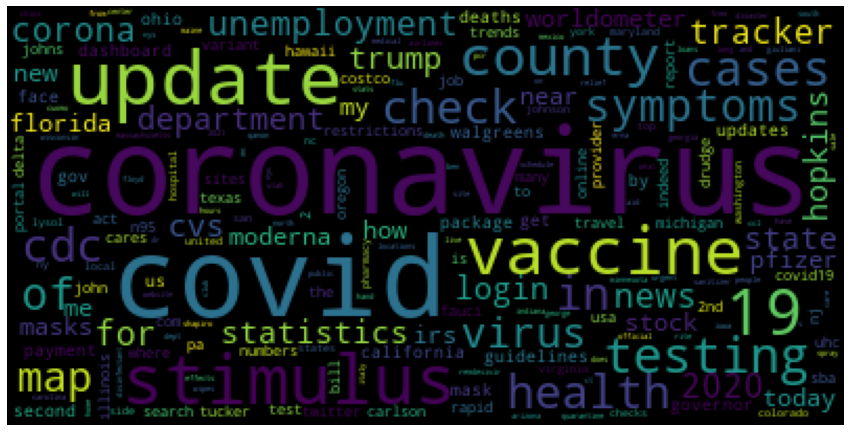

In [23]:
plt.figure(figsize=(15, 15))

plt.plot()
word_could_dict=Counter(words)
#print(word_could_dict)

wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [98]:
df_20 = df1[df1["month"]=="2021-07"]
bing_tokens = list(df_20["words"])

In [99]:
# Create Dictionary
id2word = corpora.Dictionary(bing_tokens)
# Create Corpus
texts = bing_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [100]:
# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.148*"covid" + 0.047*"update" + 0.044*"stimulus" + 0.041*"cdc" + '
  '0.038*"19" + 0.032*"vaccine" + 0.024*"county" + 0.023*"cvs" + '
  '0.022*"testing" + 0.020*"costco"'),
 (1,
  '0.071*"covid" + 0.057*"variant" + 0.045*"delta" + 0.033*"me" + 0.033*"near" '
  '+ 0.025*"testing" + 0.024*"hawaii" + 0.024*"health" + 0.020*"login" + '
  '0.017*"updates"'),
 (2,
  '0.101*"covid" + 0.069*"unemployment" + 0.052*"login" + 0.039*"sba" + '
  '0.026*"moderna" + 0.025*"portal" + 0.024*"19" + 0.024*"vaccine" + '
  '0.021*"florida" + 0.018*"pfizer"'),
 (3,
  '0.070*"covid" + 0.038*"vaccine" + 0.035*"symptoms" + 0.031*"of" + '
  '0.030*"health" + 0.029*"delta" + 0.027*"variant" + 0.024*"walgreens" + '
  '0.019*"site" + 0.019*"official"'),
 (4,
  '0.176*"coronavirus" + 0.049*"update" + 0.042*"covid" + 0.026*"worldometer" '
  '+ 0.026*"news" + 0.020*"hopkins" + 0.018*"statistics" + 0.017*"stimulus" + '
  '0.017*"cdc" + 0.017*"cases"')]


In [101]:
topic_list = []
for i in tqdm(range(len(corpus))):
    topic_list.append(lda_model.get_document_topics(corpus[i])[0][0])

Counter(topic_list)

100%|██████████| 869061/869061 [01:49<00:00, 7938.08it/s]


Counter({0: 869061})

## 2020-02 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-02')]

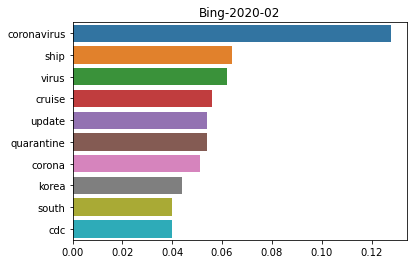

In [109]:
y = ["coronavirus", "ship", "virus", "cruise", "update", "quarantine", "corona", "korea", "south", "cdc"]
x = [0.128, 0.064, 0.062, 0.056, 0.054, 0.054, 0.051, 0.044, 0.04, 0.04]

sns.barplot(x, y).set(title="Bing-2020-02")

## 2020-03 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-03')]

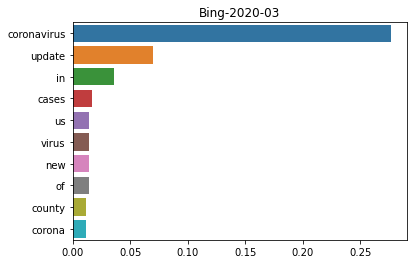

In [110]:
y = ["coronavirus", "update", "in", "cases", "us", "virus", "new", "of", "county", "corona"]
x = [0.277, 0.07, 0.036, 0.017, 0.014, 0.014, 0.014, 0.014, 0.012, 0.012]

sns.barplot(x, y).set(title="Bing-2020-03")

## 2020-04 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-04')]

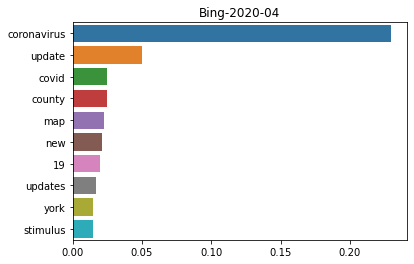

In [111]:
y = ['coronavirus', 'update', 'covid', 'county', 'map', 'new', '19', 'updates', 'york', 'stimulus']
x = [0.23, 0.05, 0.025, 0.025, 0.023, 0.021, 0.02, 0.017, 0.015, 0.015]

sns.barplot(x, y).set(title="Bing-2020-04")

## 2020-05 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-05')]

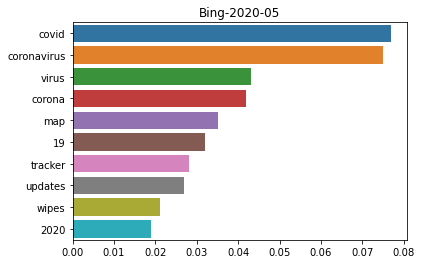

In [113]:
y = ['covid', 'coronavirus', 'virus', 'corona', 'map', '19', 'tracker', 'updates', 'wipes', '2020']
x = [0.077, 0.075, 0.043, 0.042, 0.035, 0.032, 0.028, 0.027, 0.021, 0.019]

sns.barplot(x, y).set(title="Bing-2020-05")

## 2020-06 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-06')]

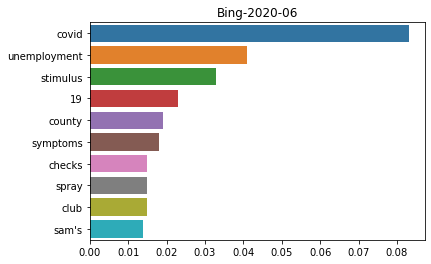

In [114]:
y = ['covid', 'unemployment', 'stimulus', '19', 'county', 'symptoms', 'checks', 'spray', 'club', "sam\'s"]
x = [0.083, 0.041, 0.033, 0.023, 0.019, 0.018, 0.015, 0.015, 0.015, 0.014]

sns.barplot(x, y).set(title="Bing-2020-06")

## 2020-07 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-07')]

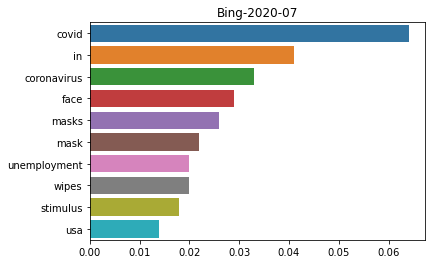

In [115]:
y = ['covid', 'in', 'coronavirus', 'face', 'masks', 'mask', 'unemployment', 'wipes', 'stimulus', 'usa']
x = [0.064, 0.041, 0.033, 0.029, 0.026, 0.022, 0.02, 0.02, 0.018, 0.014]

sns.barplot(x, y).set(title="Bing-2020-07")

## 2020-08 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-08')]

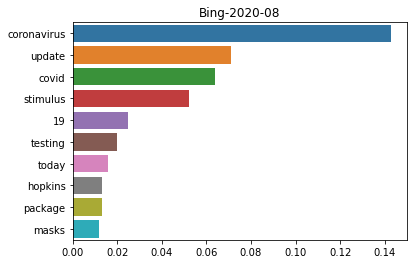

In [117]:
y = ['coronavirus', 'update', 'covid', 'stimulus', '19', 'testing', 'today', 'hopkins', 'package', 'masks']
x = [0.143, 0.071, 0.064, 0.052, 0.025, 0.02, 0.016, 0.013, 0.013, 0.012]

sns.barplot(x, y).set(title="Bing-2020-08")

## 2020-09 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-09')]

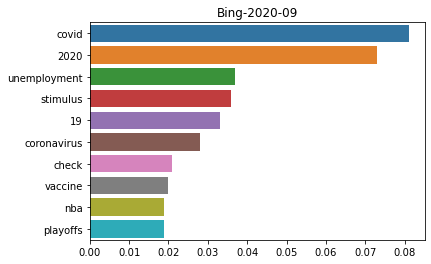

In [119]:
y = ['covid', '2020', 'unemployment', 'stimulus', '19', 'coronavirus', 'check', 'vaccine', 'nba', 'playoffs']
x = [0.081, 0.073, 0.037, 0.036, 0.033, 0.028, 0.021, 0.02, 0.019, 0.019]

sns.barplot(x, y).set(title="Bing-2020-09")

## 2020-10 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-10')]

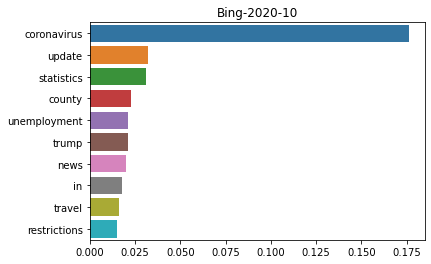

In [120]:
y = ['coronavirus', 'update', 'statistics', 'county', 'unemployment', 'trump', 'news', 'in', 'travel', 'restrictions']
x = [0.176, 0.032, 0.031, 0.023, 0.021, 0.021, 0.02, 0.018, 0.016, 0.015]

sns.barplot(x, y).set(title="Bing-2020-10")

## 2020-11 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-02')]

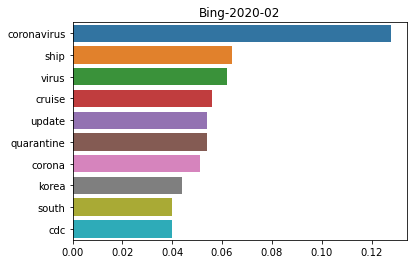

In [109]:
y = [coronavirus, update, stimulus, check, covid, worldometer, today, county, cdc, carlson]
x = [0.128, 0.064, 0.062, 0.056, 0.054, 0.054, 0.051, 0.044, 0.04, 0.04]

sns.barplot(x, y).set(title="Bing-2020-02")

## 2020-12 barplot 

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bing-2020-02')]

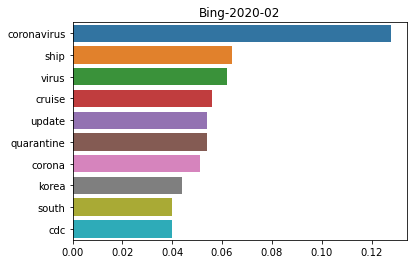

In [109]:
y = [coronavirus, update, trump, twitter, map, news, restrictions, travel, 2020, updates]
x = [0.128, 0.064, 0.062, 0.056, 0.054, 0.054, 0.051, 0.044, 0.04, 0.04]

sns.barplot(x, y).set(title="Bing-2020-02")

# Topics over time

2020-02: coronavirus, ship, virus, cruise, update, quarantine, corona, korea, south, cdc   

2020-03: coronavirus, update, in, cases, us, virus, new, of, county, corona        

2020-04: coronavirus, update, covid, county, map, new, 19, updates, york, stimulus   

2020-05: covid, coronavirus, virus, corona, map, 19, tracker, updates, wipes, 2020  

2020-06: covid, unemployment, stimulus, 19, county, symptoms, checks, spray, club, sam\'s  

2020-07: covid, in, coronavirus, face, masks, mask, unemployment, wipes, stimulus, usa

2020-08: coronavirus, update, covid, stimulus, 19, testing, today, hopkins, package, masks

2020-09: covid, 2020, unemployment, stimulus, 19, coronavirus, check, vaccine, nba, playoffs

2020-10: coronavirus, update, statistics, county, unemployment" + 0.021*"trump, news, in, travel, restrictions

2020-11: coronavirus, update, stimulus, check, covid, worldometer, today, county, cdc, carlson

2020-12: coronavirus, update, trump, twitter, map, news, restrictions, travel, 2020, updates

2021-01: coronavirus, covid, my, payment, news, get, cdc, unemployment, irs, update

2021-02: stimulus, check, covid, county, health, department, update, coronavirus, testing, vaccine

2021-03: health, county, covid, department, coronavirus, vaccine, stimulus, of, worldometer, update

2021-04: covid, coronavirus, update, 19, vaccine, health, symptoms, county, stimulus, department

2021-05: coronavirus, update, covid, vaccine, health, login, department, cvs, club, sams

2021-06: my, payment, county, covid, coronavirus, get, cdc, indeed, job, search

2021-07: covid, update, stimulus, cdc, 19, vaccine, county, cvs, testing, costco

"coronavirus, ship, virus, cruise, update, quarantine, korea, south, cdc"

"coronavirus, update, in, cases, us, new, of, county"        

"coronavirus, update, new, updates, york, stimulus"   

"coronavirus, map, tracker, updates, wipes"  

"covid, unemployment, stimulus, symptoms, checks, spray, sam's club"  

"coronavirus, face, mask, unemployment, wipes, stimulus"

"coronavirus, update, stimulus, testing, hopkins, package, masks"

"unemployment, stimulus, coronavirus, check, vaccine, nba, playoffs"

"coronavirus, update, statistics, unemployment, trump, news, travel, restrictions"

"coronavirus, update, stimulus, check, worldometer, cdc, carlson"

"coronavirus, update, trump, twitter, map, news, restrictions, travel, 2020, updates

2021-01: coronavirus, covid, my, payment, news, get, cdc, unemployment, irs, update

2021-02: stimulus, check, covid, county, health, department, update, coronavirus, testing, vaccine

2021-03: health, county, covid, department, coronavirus, vaccine, stimulus, of, worldometer, update

2021-04: covid, coronavirus, update, 19, vaccine, health, symptoms, county, stimulus, department

2021-05: coronavirus, update, covid, vaccine, health, login, department, cvs, club, sams

2021-06: my, payment, county, covid, coronavirus, get, cdc, indeed, job, search

2021-07: covid, update, stimulus, cdc, 19, vaccine, county, cvs, testing, costco

2020-02
(0,
  '0.128*"coronavirus" + 0.064*"ship" + 0.062*"virus" + 0.056*"cruise" + '
  '0.054*"update" + 0.054*"quarantine" + 0.051*"corona" + 0.044*"korea" + '
  '0.040*"south" + 0.040*"cdc"'),
 (1,
  '0.337*"coronavirus" + 0.036*"update" + 0.029*"symptoms" + 0.025*"the" + '
  '0.020*"of" + 0.019*"in" + 0.019*"is" + 0.017*"cdc" + 0.017*"what" + '
  '0.016*"map"'),
 (2,
  '0.215*"virus" + 0.192*"corona" + 0.049*"coronavirus" + 0.022*"map" + '
  '0.020*"mask" + 0.019*"in" + 0.018*"symptoms" + 0.017*"cdc" + 0.017*"n95" + '
  '0.017*"news"'),
 (3,
  '0.197*"coronavirus" + 0.108*"wuhan" + 0.096*"in" + 0.052*"china" + '
  '0.042*"cases" + 0.035*"virus" + 0.034*"us" + 0.026*"humans" + '
  '0.024*"symptoms" + 0.022*"japan"'),
 (4,
  '0.186*"virus" + 0.174*"corona" + 0.065*"coronavirus" + 0.041*"how" + '
  '0.029*"many" + 0.029*"update" + 0.024*"from" + 0.023*"have" + 0.023*"italy" '
  '+ 0.023*"people"')

2020-03
(0,
  '0.277*"coronavirus" + 0.070*"update" + 0.036*"in" + 0.017*"cases" + '
  '0.014*"us" + 0.014*"virus" + 0.014*"new" + 0.014*"of" + 0.012*"county" + '
  '0.012*"corona"'),
 (1,
  '0.166*"coronavirus" + 0.080*"virus" + 0.078*"corona" + 0.022*"in" + '
  '0.021*"2020" + 0.019*"map" + 0.018*"updates" + 0.018*"of" + 0.016*"the" + '
  '0.015*"how"'),
 (2,
  '0.239*"coronavirus" + 0.059*"cases" + 0.042*"map" + 0.039*"in" + 0.027*"of" '
  '+ 0.023*"state" + 0.020*"cdc" + 0.019*"us" + 0.018*"hand" + '
  '0.018*"sanitizer"'),
 (3,
  '0.165*"coronavirus" + 0.044*"how" + 0.032*"in" + 0.026*"to" + 0.026*"for" + '
  '0.022*"stimulus" + 0.020*"many" + 0.018*"news" + 0.018*"2020" + '
  '0.016*"have"'),
 (4,
  '0.173*"coronavirus" + 0.034*"virus" + 0.034*"corona" + 0.027*"flu" + '
  '0.026*"hopkins" + 0.022*"symptoms" + 0.021*"in" + 0.016*"deaths" + '
  '0.016*"of" + 0.016*"the"')

2020-04
(0,
  '0.230*"coronavirus" + 0.050*"update" + 0.025*"covid" + 0.025*"county" + '
  '0.023*"map" + 0.021*"new" + 0.020*"19" + 0.017*"updates" + 0.015*"york" + '
  '0.015*"stimulus"'),
 (1,
  '0.192*"coronavirus" + 0.043*"update" + 0.031*"2020" + 0.022*"covid19" + '
  '0.021*"cases" + 0.021*"how" + 0.020*"stimulus" + 0.019*"worldometer" + '
  '0.017*"cdc" + 0.016*"act"'),
 (2,
  '0.181*"coronavirus" + 0.049*"state" + 0.047*"cases" + 0.042*"virus" + '
  '0.042*"corona" + 0.036*"by" + 0.021*"in" + 0.019*"update" + 0.018*"of" + '
  '0.015*"covid"'),
 (3,
  '0.119*"covid" + 0.109*"coronavirus" + 0.085*"19" + 0.041*"cases" + '
  '0.022*"county" + 0.022*"of" + 0.018*"map" + 0.015*"in" + 0.012*"symptoms" + '
  '0.011*"health"'),
 (4,
  '0.138*"coronavirus" + 0.042*"mask" + 0.039*"face" + 0.039*"for" + '
  '0.034*"masks" + 0.028*"how" + 0.026*"to" + 0.022*"virus" + 0.022*"us" + '
  '0.021*"corona"')

2020-05
(0,
  '0.077*"covid" + 0.075*"coronavirus" + 0.043*"virus" + 0.042*"corona" + '
  '0.035*"map" + 0.032*"19" + 0.028*"tracker" + 0.027*"updates" + '
  '0.021*"wipes" + 0.019*"2020"'),
 (1,
  '0.106*"coronavirus" + 0.038*"covid" + 0.029*"stimulus" + '
  '0.028*"unemployment" + 0.023*"hopkins" + 0.023*"johns" + 0.020*"cases" + '
  '0.020*"dashboard" + 0.020*"trump" + 0.019*"in"'),
 (2,
  '0.076*"for" + 0.066*"coronavirus" + 0.042*"masks" + 0.038*"mask" + '
  '0.036*"face" + 0.030*"n95" + 0.027*"crocs" + 0.024*"health" + '
  '0.023*"county" + 0.023*"free"'),
 (3,
  '0.268*"coronavirus" + 0.069*"update" + 0.033*"covid" + 0.021*"cases" + '
  '0.019*"county" + 0.013*"for" + 0.013*"cdc" + 0.013*"map" + 0.013*"19" + '
  '0.012*"face"'),
 (4,
  '0.129*"covid" + 0.087*"19" + 0.056*"coronavirus" + 0.042*"cases" + '
  '0.035*"of" + 0.024*"symptoms" + 0.024*"state" + 0.021*"by" + 0.021*"update" '
  '+ 0.020*"corona"')

2020-06
(0,
  '0.083*"covid" + 0.041*"unemployment" + 0.033*"stimulus" + 0.023*"19" + '
  '0.019*"county" + 0.018*"symptoms" + 0.015*"checks" + 0.015*"spray" + '
  '0.015*"club" + 0.014*"sam\'s"'),
 (1,
  '0.100*"coronavirus" + 0.092*"covid" + 0.060*"update" + 0.060*"19" + '
  '0.031*"cases" + 0.019*"corona" + 0.019*"virus" + 0.019*"state" + '
  '0.015*"masks" + 0.014*"dashboard"'),
 (2,
  '0.223*"coronavirus" + 0.051*"update" + 0.042*"covid" + 0.024*"county" + '
  '0.024*"19" + 0.021*"map" + 0.020*"for" + 0.018*"worldometer" + 0.014*"in" + '
  '0.013*"health"'),
 (3,
  '0.119*"coronavirus" + 0.045*"covid" + 0.043*"2020" + 0.023*"update" + '
  '0.021*"act" + 0.019*"in" + 0.017*"symptoms" + 0.014*"statistics" + '
  '0.013*"19" + 0.012*"george"'),
 (4,
  '0.083*"coronavirus" + 0.066*"stimulus" + 0.046*"check" + 0.040*"covid" + '
  '0.031*"tracker" + 0.022*"irs" + 0.021*"second" + 0.019*"payment" + '
  '0.019*"cases" + 0.018*"get"')

2020-07
(0,
  '0.064*"covid" + 0.041*"in" + 0.033*"coronavirus" + 0.029*"face" + '
  '0.026*"masks" + 0.022*"mask" + 0.020*"unemployment" + 0.020*"wipes" + '
  '0.018*"stimulus" + 0.014*"usa"'),
 (1,
  '0.161*"coronavirus" + 0.040*"update" + 0.032*"covid" + 0.032*"for" + '
  '0.031*"masks" + 0.023*"county" + 0.019*"cdc" + 0.017*"2020" + '
  '0.016*"health" + 0.015*"cases"'),
 (2,
  '0.092*"covid" + 0.079*"stimulus" + 0.045*"check" + 0.044*"tracker" + '
  '0.028*"second" + 0.026*"testing" + 0.025*"2020" + 0.022*"coronavirus" + '
  '0.021*"package" + 0.018*"19"'),
 (3,
  '0.121*"coronavirus" + 0.093*"covid" + 0.060*"19" + 0.047*"update" + '
  '0.025*"state" + 0.022*"map" + 0.022*"virus" + 0.020*"corona" + 0.019*"face" '
  '+ 0.018*"by"'),
 (4,
  '0.151*"coronavirus" + 0.088*"covid" + 0.037*"update" + 0.035*"cases" + '
  '0.035*"19" + 0.021*"county" + 0.018*"stimulus" + 0.014*"florida" + '
  '0.014*"in" + 0.012*"face"')

2020-08
(0,
  '0.143*"coronavirus" + 0.071*"update" + 0.064*"covid" + 0.052*"stimulus" + '
  '0.025*"19" + 0.020*"testing" + 0.016*"today" + 0.013*"hopkins" + '
  '0.013*"package" + 0.012*"masks"'),
 (1,
  '0.091*"stimulus" + 0.089*"coronavirus" + 0.067*"check" + 0.023*"in" + '
  '0.023*"2" + 0.022*"update" + 0.022*"masks" + 0.020*"second" + 0.020*"face" '
  '+ 0.016*"county"'),
 (2,
  '0.138*"covid" + 0.070*"coronavirus" + 0.064*"19" + 0.037*"update" + '
  '0.029*"cases" + 0.029*"symptoms" + 0.025*"county" + 0.024*"map" + '
  '0.015*"of" + 0.013*"in"'),
 (3,
  '0.109*"coronavirus" + 0.063*"covid" + 0.059*"for" + 0.036*"face" + '
  '0.032*"masks" + 0.029*"cdc" + 0.026*"sale" + 0.019*"mask" + '
  '0.016*"worldometer" + 0.013*"update"'),
 (4,
  '0.112*"coronavirus" + 0.049*"2020" + 0.035*"covid" + 0.031*"update" + '
  '0.030*"unemployment" + 0.025*"tracker" + 0.021*"trump" + 0.018*"county" + '
  '0.018*"virus" + 0.017*"worldometer"')

2020-09
(0,
  '0.081*"covid" + 0.073*"2020" + 0.037*"unemployment" + 0.036*"stimulus" + '
  '0.033*"19" + 0.028*"coronavirus" + 0.021*"check" + 0.020*"vaccine" + '
  '0.019*"nba" + 0.019*"playoffs"'),
 (1,
  '0.101*"stimulus" + 0.066*"coronavirus" + 0.058*"update" + 0.058*"check" + '
  '0.045*"covid" + 0.024*"second" + 0.022*"2" + 0.019*"tracker" + '
  '0.018*"today" + 0.018*"face"'),
 (2,
  '0.131*"covid" + 0.092*"coronavirus" + 0.041*"cases" + 0.037*"19" + '
  '0.021*"testing" + 0.015*"statistics" + 0.015*"unemployment" + '
  '0.015*"hopkins" + 0.014*"john" + 0.014*"health"'),
 (3,
  '0.196*"coronavirus" + 0.066*"covid" + 0.060*"update" + 0.032*"19" + '
  '0.029*"symptoms" + 0.027*"county" + 0.022*"worldometer" + 0.019*"cdc" + '
  '0.016*"map" + 0.015*"updates"'),
 (4,
  '0.060*"trump" + 0.048*"coronavirus" + 0.046*"update" + 0.044*"covid" + '
  '0.034*"19" + 0.033*"news" + 0.023*"county" + 0.022*"twitter" + '
  '0.019*"stimulus" + 0.013*"payment"')

2020-10
(0,
  '0.176*"coronavirus" + 0.032*"update" + 0.031*"statistics" + 0.023*"county" '
  '+ 0.021*"unemployment" + 0.021*"trump" + 0.020*"news" + 0.018*"in" + '
  '0.016*"travel" + 0.015*"restrictions"'),
 (1,
  '0.120*"coronavirus" + 0.071*"stimulus" + 0.062*"update" + 0.060*"covid" + '
  '0.032*"check" + 0.027*"tracker" + 0.022*"19" + 0.019*"worldometer" + '
  '0.015*"testing" + 0.013*"club"'),
 (2,
  '0.171*"covid" + 0.073*"coronavirus" + 0.051*"19" + 0.026*"trump" + '
  '0.023*"map" + 0.019*"symptoms" + 0.018*"update" + 0.016*"cases" + '
  '0.016*"cdc" + 0.014*"testing"'),
 (3,
  '0.084*"stimulus" + 0.068*"check" + 0.042*"covid" + 0.038*"update" + '
  '0.037*"masks" + 0.023*"2" + 0.023*"online" + 0.020*"face" + 0.020*"2nd" + '
  '0.018*"costco"'),
 (4,
  '0.113*"covid" + 0.055*"update" + 0.051*"trump" + 0.037*"19" + '
  '0.028*"county" + 0.023*"testing" + 0.021*"2020" + 0.018*"health" + '
  '0.017*"cvs" + 0.016*"coronavirus"')

2020-11
(0,
  '0.140*"coronavirus" + 0.071*"update" + 0.051*"stimulus" + 0.028*"check" + '
  '0.024*"covid" + 0.023*"worldometer" + 0.020*"today" + 0.019*"county" + '
  '0.014*"cdc" + 0.014*"carlson"'),
 (1,
  '0.117*"coronavirus" + 0.066*"covid" + 0.030*"statistics" + 0.026*"update" + '
  '0.022*"unemployment" + 0.020*"cdc" + 0.019*"vaccine" + 0.018*"in" + '
  '0.017*"testing" + 0.015*"act"'),
 (2,
  '0.109*"covid" + 0.051*"county" + 0.030*"health" + 0.028*"testing" + '
  '0.024*"vaccine" + 0.021*"department" + 0.020*"coronavirus" + '
  '0.018*"stimulus" + 0.017*"login" + 0.013*"2020"'),
 (3,
  '0.199*"covid" + 0.095*"19" + 0.063*"coronavirus" + 0.036*"symptoms" + '
  '0.035*"update" + 0.029*"testing" + 0.020*"hopkins" + 0.019*"tracker" + '
  '0.018*"of" + 0.015*"cvs"'),
 (4,
  '0.100*"covid" + 0.040*"coronavirus" + 0.033*"trump" + 0.024*"cases" + '
  '0.023*"testing" + 0.022*"near" + 0.022*"me" + 0.021*"2020" + 0.020*"test" + '
  '0.019*"update"')

2020-12
(0,
  '0.184*"coronavirus" + 0.021*"update" + 0.019*"trump" + 0.018*"twitter" + '
  '0.017*"map" + 0.017*"news" + 0.017*"restrictions" + 0.016*"travel" + '
  '0.015*"2020" + 0.014*"updates"'),
 (1,
  '0.123*"vaccine" + 0.054*"covid" + 0.043*"county" + 0.040*"moderna" + '
  '0.039*"pfizer" + 0.034*"stock" + 0.028*"health" + 0.026*"coronavirus" + '
  '0.022*"stimulus" + 0.022*"package"'),
 (2,
  '0.136*"coronavirus" + 0.115*"stimulus" + 0.090*"update" + 0.062*"check" + '
  '0.037*"covid" + 0.023*"today" + 0.020*"statistics" + 0.020*"worldometer" + '
  '0.020*"cdc" + 0.019*"second"'),
 (3,
  '0.107*"covid" + 0.068*"testing" + 0.034*"cvs" + 0.033*"login" + '
  '0.028*"news" + 0.026*"unemployment" + 0.024*"19" + 0.023*"trump" + '
  '0.020*"walgreens" + 0.018*"virus"'),
 (4,
  '0.258*"covid" + 0.079*"19" + 0.042*"testing" + 0.030*"symptoms" + '
  '0.030*"update" + 0.026*"me" + 0.026*"near" + 0.018*"cdc" + 0.015*"test" + '
  '0.014*"of"')

2021-01
(0,
  '0.074*"coronavirus" + 0.064*"covid" + 0.035*"my" + 0.029*"payment" + '
  '0.028*"news" + 0.023*"get" + 0.020*"cdc" + 0.019*"unemployment" + '
  '0.019*"irs" + 0.017*"update"'),
 (1,
  '0.183*"covid" + 0.085*"vaccine" + 0.061*"coronavirus" + 0.049*"19" + '
  '0.046*"update" + 0.037*"stimulus" + 0.020*"county" + 0.019*"check" + '
  '0.018*"testing" + 0.016*"symptoms"'),
 (2,
  '0.075*"covid" + 0.037*"county" + 0.032*"my" + 0.031*"testing" + '
  '0.029*"vaccine" + 0.026*"stimulus" + 0.024*"health" + 0.022*"payment" + '
  '0.019*"check" + 0.018*"trump"'),
 (3,
  '0.083*"health" + 0.052*"county" + 0.047*"department" + 0.034*"coronavirus" '
  '+ 0.022*"gov" + 0.022*"covid" + 0.019*"of" + 0.017*"cdc" + 0.015*"login" + '
  '0.013*"vaccine"'),
 (4,
  '0.061*"stimulus" + 0.050*"coronavirus" + 0.037*"covid" + 0.033*"tracker" + '
  '0.026*"county" + 0.025*"check" + 0.025*"vaccine" + 0.022*"irs" + '
  '0.019*"masks" + 0.015*"testing"')

2021-02
(0,
  '0.100*"stimulus" + 0.040*"check" + 0.028*"covid" + 0.027*"county" + '
  '0.023*"health" + 0.021*"department" + 0.020*"update" + 0.020*"coronavirus" '
  '+ 0.019*"testing" + 0.015*"vaccine"'),
 (1,
  '0.058*"covid" + 0.056*"health" + 0.045*"county" + 0.035*"department" + '
  '0.025*"coronavirus" + 0.019*"vaccine" + 0.017*"my" + 0.017*"unemployment" + '
  '0.017*"get" + 0.017*"login"'),
 (2,
  '0.144*"covid" + 0.034*"county" + 0.027*"stimulus" + 0.027*"vaccine" + '
  '0.024*"19" + 0.021*"coronavirus" + 0.015*"in" + 0.014*"com" + '
  '0.014*"update" + 0.012*"tracker"'),
 (3,
  '0.148*"covid" + 0.146*"vaccine" + 0.034*"coronavirus" + 0.026*"health" + '
  '0.023*"county" + 0.019*"update" + 0.017*"walgreens" + 0.016*"19" + '
  '0.013*"gov" + 0.011*"department"'),
 (4,
  '0.109*"covid" + 0.067*"coronavirus" + 0.036*"cvs" + 0.030*"com" + '
  '0.029*"19" + 0.022*"health" + 0.022*"county" + 0.021*"walgreens" + '
  '0.019*"update" + 0.017*"gov"')

2021-03
(0,
  '0.073*"health" + 0.061*"county" + 0.050*"covid" + 0.046*"department" + '
  '0.041*"coronavirus" + 0.018*"vaccine" + 0.016*"stimulus" + 0.015*"of" + '
  '0.013*"worldometer" + 0.011*"update"'),
 (1,
  '0.207*"covid" + 0.081*"vaccine" + 0.041*"19" + 0.030*"stimulus" + '
  '0.027*"walgreens" + 0.025*"cvs" + 0.016*"county" + 0.013*"com" + '
  '0.013*"tracker" + 0.012*"vaccines"'),
 (2,
  '0.161*"vaccine" + 0.085*"covid" + 0.031*"update" + 0.029*"health" + '
  '0.027*"coronavirus" + 0.024*"county" + 0.023*"stimulus" + 0.016*"cdc" + '
  '0.015*"department" + 0.013*"johnson"'),
 (3,
  '0.089*"coronavirus" + 0.078*"covid" + 0.044*"stimulus" + 0.032*"update" + '
  '0.029*"check" + 0.020*"testing" + 0.020*"unemployment" + 0.018*"com" + '
  '0.017*"login" + 0.016*"county"'),
 (4,
  '0.071*"covid" + 0.054*"vaccine" + 0.044*"my" + 0.035*"payment" + '
  '0.030*"get" + 0.025*"irs" + 0.022*"gov" + 0.021*"stimulus" + 0.019*"county" '
  '+ 0.018*"where"')

2021-04
(0,
  '0.100*"covid" + 0.058*"coronavirus" + 0.057*"update" + 0.049*"19" + '
  '0.046*"vaccine" + 0.035*"health" + 0.018*"symptoms" + 0.016*"county" + '
  '0.016*"stimulus" + 0.014*"department"'),
 (1,
  '0.076*"covid" + 0.074*"stimulus" + 0.043*"check" + 0.042*"my" + '
  '0.036*"coronavirus" + 0.035*"tracker" + 0.033*"irs" + 0.029*"payment" + '
  '0.028*"get" + 0.021*"gov"'),
 (2,
  '0.075*"covid" + 0.056*"county" + 0.041*"vaccine" + 0.034*"health" + '
  '0.032*"johnson" + 0.024*"department" + 0.018*"side" + 0.018*"effects" + '
  '0.016*"and" + 0.015*"of"'),
 (3,
  '0.163*"covid" + 0.068*"vaccine" + 0.067*"coronavirus" + 0.030*"cvs" + '
  '0.021*"cdc" + 0.018*"walgreens" + 0.016*"testing" + 0.015*"registration" + '
  '0.014*"19" + 0.012*"guidelines"'),
 (4,
  '0.131*"vaccine" + 0.061*"covid" + 0.028*"pfizer" + 0.025*"coronavirus" + '
  '0.019*"county" + 0.018*"my" + 0.018*"payment" + 0.017*"moderna" + '
  '0.016*"stimulus" + 0.016*"where"')

2021-05
(0,
  '0.148*"coronavirus" + 0.029*"update" + 0.027*"covid" + 0.023*"vaccine" + '
  '0.022*"health" + 0.016*"login" + 0.016*"department" + 0.014*"cvs" + '
  '0.013*"club" + 0.013*"sams"'),
 (1,
  '0.065*"stimulus" + 0.039*"vaccine" + 0.030*"county" + 0.028*"my" + '
  '0.028*"where" + 0.028*"login" + 0.022*"check" + 0.021*"covid" + '
  '0.021*"update" + 0.020*"unemployment"'),
 (2,
  '0.090*"covid" + 0.065*"coronavirus" + 0.051*"vaccine" + 0.028*"health" + '
  '0.018*"county" + 0.017*"loan" + 0.015*"cdc" + 0.015*"cases" + 0.015*"ppp" + '
  '0.015*"virus"'),
 (3,
  '0.136*"covid" + 0.050*"coronavirus" + 0.038*"19" + 0.032*"in" + '
  '0.026*"update" + 0.023*"virus" + 0.023*"corona" + 0.019*"cases" + '
  '0.015*"india" + 0.015*"vaccine"'),
 (4,
  '0.064*"stimulus" + 0.060*"my" + 0.057*"payment" + 0.057*"get" + '
  '0.036*"covid" + 0.028*"irs" + 0.026*"check" + 0.023*"coronavirus" + '
  '0.017*"tracker" + 0.015*"india"')

2021-06
(0,
  '0.034*"my" + 0.025*"payment" + 0.025*"county" + 0.024*"covid" + '
  '0.023*"coronavirus" + 0.021*"get" + 0.020*"cdc" + 0.018*"indeed" + '
  '0.018*"job" + 0.018*"search"'),
 (1,
  '0.081*"covid" + 0.048*"coronavirus" + 0.038*"19" + 0.035*"news" + '
  '0.028*"update" + 0.025*"cdc" + 0.021*"tracker" + 0.018*"login" + '
  '0.017*"guidelines" + 0.016*"hawaii"'),
 (2,
  '0.102*"covid" + 0.088*"coronavirus" + 0.056*"update" + 0.045*"vaccine" + '
  '0.042*"stimulus" + 0.024*"county" + 0.021*"testing" + 0.020*"walgreens" + '
  '0.016*"symptoms" + 0.015*"unemployment"'),
 (3,
  '0.089*"coronavirus" + 0.079*"covid" + 0.036*"vaccine" + 0.032*"cases" + '
  '0.019*"us" + 0.015*"hopkins" + 0.014*"virus" + 0.014*"corona" + '
  '0.013*"dashboard" + 0.013*"worldometer"'),
 (4,
  '0.055*"health" + 0.039*"login" + 0.032*"delta" + 0.031*"sba" + '
  '0.029*"variant" + 0.028*"covid" + 0.021*"stock" + 0.019*"stimulus" + '
  '0.018*"department" + 0.018*"unemployment"')

2021-07
(0,
  '0.148*"covid" + 0.047*"update" + 0.044*"stimulus" + 0.041*"cdc" + '
  '0.038*"19" + 0.032*"vaccine" + 0.024*"county" + 0.023*"cvs" + '
  '0.022*"testing" + 0.020*"costco"'),
 (1,
  '0.071*"covid" + 0.057*"variant" + 0.045*"delta" + 0.033*"me" + 0.033*"near" '
  '+ 0.025*"testing" + 0.024*"hawaii" + 0.024*"health" + 0.020*"login" + '
  '0.017*"updates"'),
 (2,
  '0.101*"covid" + 0.069*"unemployment" + 0.052*"login" + 0.039*"sba" + '
  '0.026*"moderna" + 0.025*"portal" + 0.024*"19" + 0.024*"vaccine" + '
  '0.021*"florida" + 0.018*"pfizer"'),
 (3,
  '0.070*"covid" + 0.038*"vaccine" + 0.035*"symptoms" + 0.031*"of" + '
  '0.030*"health" + 0.029*"delta" + 0.027*"variant" + 0.024*"walgreens" + '
  '0.019*"site" + 0.019*"official"'),
 (4,
  '0.176*"coronavirus" + 0.049*"update" + 0.042*"covid" + 0.026*"worldometer" '
  '+ 0.026*"news" + 0.020*"hopkins" + 0.018*"statistics" + 0.017*"stimulus" + '
  '0.017*"cdc" + 0.017*"cases"')

# Word Embedding on Bing

In [43]:
month1 = ["coronavirus", "ship", "virus", "cruise", "update", "quarantine", "corona", "korea", "south", "cdc"]
month2 = ["coronavirus", "update", "in", "cases", "us", "virus", "new", "of", "county", "corona"]
month3 = ['coronavirus', 'update', 'covid', 'county', 'map', 'new', '19', 'updates', 'york', 'stimulus']   
month4 = ['covid', 'coronavirus', 'virus', 'corona', 'map', '19', 'tracker', 'updates', 'wipes', '2020']  
month5 = ['covid', 'unemployment', 'stimulus', '19', 'county', 'symptoms', 'checks', 'spray', 'club', "sam\'s"]
month6 = ['covid', 'in', 'coronavirus', 'face', 'masks', 'mask', 'unemployment', 'wipes', 'stimulus', 'usa']
month8 = ['coronavirus', 'update', 'covid', 'stimulus', '19', 'testing', 'today', 'hopkins', 'package', 'masks']
month9 = ['covid', '2020', 'unemployment', 'stimulus', '19', 'coronavirus', 'check', 'vaccine', 'nba', 'playoffs']
month10 = ['coronavirus', 'update', 'statistics', 'county', 'unemployment', 'trump', 'news', 'in', 'travel', 'restrictions']
month11 = ['coronavirus', 'update', 'stimulus', 'check', 'covid', 'worldometer', 'today', 'county', 'cdc', 'carlson']
month12 = ['coronavirus', 'update', 'trump', 'twitter', 'map', 'news', 'restrictions', 'travel', '2020', 'updates']
month13 = ['coronavirus', 'covid', 'my', 'payment', 'news', 'get', 'cdc', 'unemployment', 'irs', 'update']
month14 = ['stimulus', 'check', 'covid', 'county', 'health', 'department', 'update', 'coronavirus', 'testing', 'vaccine']
month15 = ['health', 'county', 'covid', 'department', 'coronavirus', 'vaccine', 'stimulus', 'of', 'worldometer', 'update']
month16 = ['covid', 'coronavirus', 'update', '19', 'vaccine', 'health', 'symptoms', 'county', 'stimulus', 'department']
month17 = ['coronavirus', 'update', 'covid', 'vaccine', 'health', 'login', 'department', 'cvs', 'club', 'sams']
month18 = ['my', 'payment', 'county', 'covid', 'coronavirus', 'get', 'cdc', 'indeed', 'job', 'search']
month19 = ['covid', 'update', 'stimulus', 'cdc', '19', 'vaccine', 'county', 'cvs', 'testing', 'costco']


In [ ]:
model = Word2Vec(sentences=words, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

# Final Reuslt on Topics

From Twitter:    
02/2020 - 06/2020: coronavirus update, mask required, need help     
07/2020 - 12/2020: US election, Trump tested positive, vaccination plan      
01/2021 - 03/2021: confirmed case increase, increasing need for vaccine     
04/2021 - 07/2021: get vaccine, delta variant      
From Bing:    
02/2020 - 06/2020: coronavirus symptoms, coronavirus update    
07/2020 - 12/2020: stimulus check, sam’s club    
01/2021 - 03/2021: vaccine, get my payment    
04/2021 - 07/2021: get vaccinated, delta variant, indeed job search    


In [15]:
topics = ["coronavirus update, mask required, need help", "US election, Trump tested positive, vaccination plan", "confirmed case increase, increasing need for vaccine", "get vaccine, delta variant"]
time = ["02/2020 - 06/2020", "07/2020 - 12/2020", "01/2021 - 03/2021", "04/2021 - 07/2021"]

In [18]:
df = pd.DataFrame()
df["time"] = time
df["topics"] = topics

In [19]:
df

,time,topics
0,02/2020 - 06/2020,"coronavirus update, mask required, need help"
1,07/2020 - 12/2020,"US election, Trump tested positive, vaccinatio..."
2,01/2021 - 03/2021,"confirmed case increase, increasing need for v..."
3,04/2021 - 07/2021,"get vaccine, delta variant"
